In [1]:
import pandas as pd
import gzip
import json
from matplotlib import pyplot as plt
from collections import defaultdict
import sklearn
from sklearn import linear_model
import numpy
import random
import gzip
import math




def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Video_Games_5.json.gz')

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
import sklearn
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
f = gzip.open("Video_Games_5.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))
    


In [4]:
print(len(dataset))
#print(len(dataset[]))
keyDict = defaultdict(list)
keyLens = []
for d in dataset:
    keyDict[len(d.keys())].append(d)
    keyLens.append((len(d.keys())))
print(type(keyLens))
print(len(keyLens))


497577
<class 'list'>
497577


In [5]:
minKeys = min(keyLens)
maxKeys = max(keyLens)
avgKeys = np.mean(keyLens) 
print(minKeys) #there are at least 7 keys that show up on all of them
print(maxKeys) #max 12 which is consistent with the dataframe values
print(avgKeys) #on average 9.8 keys show up we need to figure out which 7 keys are always there
print(keyDict[minKeys][0].keys())
print(len(keyDict[minKeys]))
print(len(keyDict[8]))
print(keyDict[9][0].keys())

#from this we find that we need three main keys reviewText, summary, reviewerName/reviewerId, reviewTime(for the timeframe)
#most reviews have those but not always reviewText and summary so if it doesnt have this then we will remove it from the dataset

7
12
9.80454080473977
dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'unixReviewTime'])
3
90
dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])


In [6]:
print(len(keyDict[9]))
print(len(keyDict[10]))
print(len(keyDict[11]))
print(len(keyDict[12]))
lenNinePlus = (len(keyDict[9]) + len(keyDict[10]) + len(keyDict[11]) + len(keyDict[12]))

162136
271215
63197
936


In [7]:
mainKeyList = ['overall', 'reviewerName', 'reviewText','reviewTime', 'asin'] #these are the main things we need
mainD = []

print(mainKeyList)
for d in dataset:
    #print(type(d))
    #print(list(d.keys()))
    truth = True
    for c in mainKeyList:
        if c not in list(d.keys()):
            truth = False
    if truth:
        mainD.append(d)
    #if mainKeyList in list(d.keys()): #we will keep only these data 
        #mainD.append(d)


['overall', 'reviewerName', 'reviewText', 'reviewTime', 'asin']


In [8]:
print(len(mainD)) 
lenNinePlus = (len(keyDict[9]) + len(keyDict[10]) + len(keyDict[11]) + len(keyDict[12]))
print(len(mainD) < lenNinePlus) #interestingly its less than the added up ones but makes sense

497343
True


In [9]:
mainDf = pd.DataFrame(mainD)
mainDf.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [10]:
#mainDf = mainDf.drop(labels = [])
numNull = []
numNull.append(mainDf['overall'].isna().sum())
numNull.append(mainDf['verified'].isna().sum())
numNull.append(mainDf['reviewTime'].isna().sum())
numNull.append(mainDf['reviewerID'].isna().sum())
numNull.append(mainDf['asin'].isna().sum())
numNull.append(mainDf['reviewerName'].isna().sum())
numNull.append(mainDf['reviewText'].isna().sum())
numNull.append(mainDf['summary'].isna().sum())
numNull.append(mainDf['unixReviewTime'].isna().sum())
numNull.append(mainDf['vote'].isna().sum())
numNull.append(mainDf['style'].isna().sum())
numNull.append(mainDf['image'].isna().sum())


print(numNull) #first 5 make sense since we literally decided that these columsn shouldnt be empty
#interestingly reviewer name isnt empty either so thats nice but also not necessary
#also interestingly the summary isnt empty sinse its supposed to correlate with the reviewTexxt, summary = 6 (starting from 0)
#the last three were expected to have been not 0 since there might not have existed those features dating to back then
#lets first run data visualization on these values
print(len(numNull))

mainDf.isna().sum()

[0, 0, 0, 0, 0, 0, 0, 103, 0, 389575, 208268, 493750]
12


overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText             0
summary              103
unixReviewTime         0
vote              389575
style             208268
image             493750
dtype: int64

first 5 make sense since we literally decided that these columsn shouldnt be empty
interestingly reviewer name isnt empty either so thats nice but also not necessary
also interestingly the summary isnt empty sinse its supposed to correlate with the reviewTexxt, summary = 6 (starting from  the last three were expected to have been not 0 since there might not have existed those features dating to back then

Before we run data visualization on these values lets first fill the values with zeros. First we recognizae that style and image are useless to the rating we are aiming to predict 

In [11]:
print(mainDf.dtypes)
print(list(mainDf['vote'])) #notice that the vote is a string that can be made into a number so we will do that

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '28', '11', nan, nan, '2', '14', nan, nan, '12', nan, nan, nan, nan, nan, nan, nan, nan, nan, '7', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '9', '13', nan, nan, '4', '7', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '11', '55', nan, '4', nan, '25', nan, nan, nan, '2', nan, nan, nan, '2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [12]:
#replace all nans with zero
mainDf['vote'] = mainDf['vote'].fillna(0)
#mainDf['vote'] = [int(x) for x in list(mainDf['vote'])] 

In [13]:
#so we get this error invalid literal for int() with base 10: '1,000'
#to fix this we willl first check if string

In [14]:
import re

In [15]:
print(type(list(mainDf['vote'])[12])) #notice 
tempVotes = []
for x in mainDf['vote']:
    #print(isinstance(x,int))
    if not isinstance(x,int):
        res = re.sub(r'[^\w\s]', '', x)
        tempVotes.append(int(res))
    else:
        tempVotes.append(x)
        
print(len(tempVotes))

#mainDf['vote'] = [int( re.sub(r'[^\w\s]', '', test_str)) for x in list(mainDf['vote']) if type(x) != 'int'] 

<class 'str'>
497343


In [16]:
for x in tempVotes:
    if not isinstance(x,int):
        print("Failed")
        print(type(x))
    else:
        pass
#this basically checks to make sure all values are ints

In [17]:
mainDf['vote'] = tempVotes

In [18]:
mainDf.describe() # we got one more int column which works. another thing to consider is when the votes got implemented to get an idea for which values to remove too

,overall,unixReviewTime,vote
count,497343.000000,4.973430e+05,497343.000000
mean,4.220329,1.367812e+09,2.309040
std,1.185478,1.224234e+08,17.137017
min,1.000000,9.398592e+08,0.000000
25%,4.000000,1.316477e+09,0.000000
50%,5.000000,1.410134e+09,0.000000
75%,5.000000,1.452298e+09,0.000000
max,5.000000,1.538438e+09,2474.000000


In [19]:
#so we want to create a filter that allows us to incorporate votes as well to create a dataframe of the val
listVals = [x for x in mainDf['overall'] if x < 0]
print(len(listVals)) #we dont need to check this since describe does this for us and we dont have a single incorrect value
#by looking at the min

0


In [20]:
#lets first rename the overall column because it should be named rating
mainDf = mainDf.rename(columns = {'overall': 'rating'})
mainDf.head() #this worked

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,0,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,0,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,0,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,0,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,0,NaN,NaN


In [21]:
#lets try filtering now
newDf = mainDf[mainDf['vote'] == 0]
(newDf.head())
#newDf.dtypes

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,0,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,0,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,0,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,0,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,0,NaN,NaN


In [22]:
print(len(newDf)) #thats a lot of votes with zero

#lets get a list of the years of the dataframe
years = []
years = [int(x[-4:]) for x in newDf['reviewTime']] #this is originally a string which we will now convert to a datatime
print(years[:100])
print(pd.DataFrame(years).describe()) #idk what to do with this information

389575
[2015, 2015, 2015, 2015, 2014, 2014, 2014, 2014, 2014, 2013, 2012, 2011, 2011, 2013, 2013, 2015, 2015, 2014, 2014, 2013, 2014, 2014, 2014, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2012, 2012, 2012, 2012, 2011, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2013, 2013, 2013, 2013, 2013, 2011, 2010, 2018, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016]
                   0
count  389575.000000
mean     2013.643375
std         3.312475
min      1999.000000
25%      2013.000000
50%      2015.000000
75%      2016.000000
max      2018.000000


Shape of the data

In [23]:
print(mainDf.describe())  #we just remembered that the unixReviewTime is useless so we will drop these as well

              rating  unixReviewTime           vote
count  497343.000000    4.973430e+05  497343.000000
mean        4.220329    1.367812e+09       2.309040
std         1.185478    1.224234e+08      17.137017
min         1.000000    9.398592e+08       0.000000
25%         4.000000    1.316477e+09       0.000000
50%         5.000000    1.410134e+09       0.000000
75%         5.000000    1.452298e+09       0.000000
max         5.000000    1.538438e+09    2474.000000


In [24]:
mainDf = mainDf.drop(['unixReviewTime', 'style', 'image'], axis=1)


In [25]:
mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0


In [26]:
print(mainDf.dtypes)
#from here we notice that there are only two integer values lets see what we can do with this data

rating          float64
verified           bool
reviewTime       object
reviewerID       object
asin             object
reviewerName     object
reviewText       object
summary          object
vote              int64
dtype: object


In [27]:
#you can convert asin to an integer if you want or check to make sure the length of each asin is at least 
#print(len('0700026657')) #10, 
for x in mainDf['asin']:
    if len(x) != 10:
        print("fake asin")
    else:
        pass
#no output so we can keep it as is or conver it to an int idk

#something to consider is maybe dropping the verified

In [28]:
mainDf['reviewYear'] = mainDf['reviewTime'].apply(lambda x: int(x[-4:]))
mainDf[mainDf['vote']==0].groupby('reviewYear').count().sort_values('verified')

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote
reviewYear,,,,,,,,,
1999,14,14,14,14,14,14,14,14,14
2000,621,621,621,621,621,621,621,621,621
2006,2206,2206,2206,2206,2206,2206,2206,2205,2206
2001,2497,2497,2497,2497,2497,2497,2497,2497,2497
2005,2737,2737,2737,2737,2737,2737,2737,2736,2737
2004,2904,2904,2904,2904,2904,2904,2904,2904,2904
2003,3490,3490,3490,3490,3490,3490,3490,3490,3490
2002,3917,3917,3917,3917,3917,3917,3917,3915,3917
2007,4542,4542,4542,4542,4542,4542,4542,4542,4542


In [29]:
mainDf[mainDf['reviewYear'] == '1998']

mainDf['reviewLength'] = [len(x) for x in mainDf['reviewText']]

mainDf.describe()

,rating,vote,reviewYear,reviewLength
count,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963
std,1.185478,17.137017,3.899879,1266.191356
min,1.000000,0.000000,1999.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000
50%,5.000000,0.000000,2014.000000,210.000000
75%,5.000000,0.000000,2016.000000,710.000000
max,5.000000,2474.000000,2018.000000,32721.000000


In [30]:
#mainDf.plot(x='rating',y='reviewLength')

In [31]:
#we will now do the line plot of rating over time. There will be 6 lines
# for rating of 1, 2, 3, 4, 5, and average rating.
#on the y axis is the count and the x axis is the year

mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0,2015,8
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58


In [32]:
#we will filter and run everything again

mainDf['numWords'] = [len(x.split()) for x in mainDf['reviewText']]

lower1, upper9 = np.percentile(mainDf['numWords'], [10, 94])
print(lower1, upper9)

upperNine = np.percentile(mainDf['numWords'], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
print (upperNine)

eightyFive = np.percentile(mainDf['numWords'], [85])
print(eightyFive)



#we notice that some reviews have either lots of words or not enough words so we will filter by having each review being above 10 words
#which is approx 25% and between 250 words. This between 1 sentence per review and a mini paragraph which is good

filteredDf = mainDf[mainDf['numWords'] > 10]
filteredDf #reduced the size of dataframe by 100,000 or about 20%



filteredDf = filteredDf[filteredDf['numWords'] < 250]
filteredDf #this reduced size to about 300k which means we filtered  nearly 40% of our data whihc is good

























2.0 469.0
[ 328.  356.  387.  425.  469.  525.  598.  694.  838. 1080. 5928.]
[231.]


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21
...,...,...,...,...,...,...,...,...,...,...,...,...
497334,5.0,True,"06 19, 2017",AVOS4AN9YUGCL,B01HFRICLE,Jim Y,If you played and enjoyed River City Ransom on...,Nostalgic Fun,0,2017,169,34
497336,3.0,True,"05 20, 2017",A3JLLK1KJFD3BN,B01HFRICLE,A. Lai,This nostalgic game with updaged game play ele...,"special moves) looks great, plays awesome but ...",0,2017,259,47
497337,5.0,True,"07 1, 2017",A2NKYXCAGBGW7F,B01HGPUTCA,Snipun1,"This Work Great and easy to replace, I would n...",I plan on doing all my controllers this way now,0,2017,134,24
497340,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,0,2017,343,67


In [33]:
mainDf.describe()

,rating,vote,reviewYear,reviewLength,numWords
count,497343.000000,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963,122.701429
std,1.185478,17.137017,3.899879,1266.191356,227.005962
min,1.000000,0.000000,1999.000000,1.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000,11.000000
50%,5.000000,0.000000,2014.000000,210.000000,40.000000
75%,5.000000,0.000000,2016.000000,710.000000,132.000000
max,5.000000,2474.000000,2018.000000,32721.000000,5928.000000


In [34]:
yearDf = mainDf.groupby('reviewYear')
yearDf.head()
#yearDf.describe()
#yearDf[yearDf['rating'] == 5.0]
#yearDf[yearDf['rating']  > 0]

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,0,2015,8,2
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
...,...,...,...,...,...,...,...,...,...,...,...,...
704,5.0,False,"11 25, 1999",A3NK7ASILKG3TX,B00000DMAD,Simon Lund Larsen,If you liked Full Trottle and love LucasArts' ...,LucasArts have done it again,8,1999,426,74
2599,3.0,True,"02 14, 2018",AHGW67EQ751LS,B00000J2W7,Max Werner,"It won't autosave, and it resets progress on r...",Three Stars,0,2018,94,18
2704,3.0,True,"03 16, 2018",AYXTNDD9FJBVK,B00000J97G,C,Missing battery cover,Three Stars,0,2018,21,3
3104,5.0,True,"01 2, 2018",A3ISBEPYLY8IMO,B00000JRSB,Jimmy,Received this in perfect condition. Great rese...,Received this in perfect condition. Great rese...,0,2018,258,45


In [35]:
five = mainDf[mainDf['rating'] == 5].groupby('reviewYear').count()
five
four = mainDf[mainDf['rating'] == 4].groupby('reviewYear').count()
three = mainDf[mainDf['rating'] == 3].groupby('reviewYear').count()
two = mainDf[mainDf['rating'] == 2].groupby('reviewYear').count()
one = mainDf[mainDf['rating'] == 1].groupby('reviewYear').count()
avg = mainDf.groupby('reviewYear')['rating'].mean()
avg #now we got everything we need

reviewYear
1999    4.259259
2000    4.066703
2001    4.101384
2002    4.096708
2003    4.060151
2004    4.002760
2005    4.001798
2006    3.881760
2007    3.989402
2008    3.947143
2009    3.970190
2010    3.963285
2011    4.005543
2012    4.026498
2013    4.229022
2014    4.309473
2015    4.365534
2016    4.337505
2017    4.341998
2018    4.333813
Name: rating, dtype: float64

In [36]:
mainDf.describe()

,rating,vote,reviewYear,reviewLength,numWords
count,497343.000000,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963,122.701429
std,1.185478,17.137017,3.899879,1266.191356,227.005962
min,1.000000,0.000000,1999.000000,1.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000,11.000000
50%,5.000000,0.000000,2014.000000,210.000000,40.000000
75%,5.000000,0.000000,2016.000000,710.000000,132.000000
max,5.000000,2474.000000,2018.000000,32721.000000,5928.000000


In [37]:
#time to create the plots. Our x axis stays the same every time its the years
x = mainDf['reviewYear']
x = list(x)
#for val in x:
    #print(type(x))
print(type(x))
x = set(x)
print(x)
x = list(x)
print(x)
#x = x.sort()
#x = [int(val) for val in x]
print(type(x))
#for val in x:
    #print(type(val))
xAxis = x
xAxis

<class 'list'>
{1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
<class 'list'>


[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [38]:
one
y1 = list(one['rating'])
print(y1)
y2 = list(two['rating'])
print(y2)
y3 = list(three['rating'])
print(y3)
y4 = list(four['rating'])
print(y4)
y5 = list(five['rating'])
print(y5)
print(avg)
yAvg = list(avg)
print(yAvg)
print(len(yAvg) == len(y2)) #so we got all the y vals



[3, 99, 260, 394, 326, 498, 503, 535, 629, 1465, 1491, 1486, 1435, 2222, 2814, 4157, 4905, 4533, 2413, 705]
[6, 142, 317, 476, 457, 463, 525, 564, 721, 1316, 1314, 1236, 1262, 1590, 2280, 3067, 3411, 3004, 1510, 469]
[4, 234, 660, 883, 889, 909, 1050, 1046, 1523, 2653, 2712, 2479, 2463, 3163, 4918, 6434, 7126, 5966, 3061, 953]
[22, 445, 1298, 1871, 2125, 2028, 2086, 1954, 2860, 5024, 5190, 4450, 4746, 5880, 9260, 12239, 13797, 11157, 5466, 1732]
[46, 939, 2594, 3728, 3202, 3349, 3623, 2946, 4741, 8669, 9219, 8734, 9399, 13713, 28968, 47867, 62022, 51164, 26714, 7947]
reviewYear
1999    4.259259
2000    4.066703
2001    4.101384
2002    4.096708
2003    4.060151
2004    4.002760
2005    4.001798
2006    3.881760
2007    3.989402
2008    3.947143
2009    3.970190
2010    3.963285
2011    4.005543
2012    4.026498
2013    4.229022
2014    4.309473
2015    4.365534
2016    4.337505
2017    4.341998
2018    4.333813
Name: rating, dtype: float64
[4.2592592592592595, 4.06670252824099, 4.10138

In [39]:
print(len(y1))
numYears = len(y1)
i = 0
ratingsPerYear = []
sumRatingsPerYear = []
avgPercentPerYear = []
while i < numYears:
    val = 0
    numRatings = 0
    val += y1[i] * 1
    numRatings += y1[i]
    val += y2[i] * 2
    numRatings += y2[i]
    val += y3[i] * 3
    numRatings += y3[i]
    val += y4[i] * 4
    numRatings += y4[i]
    val += y5[i] * 5
    numRatings += y5[i]
    
    ratingsPerYear.append(numRatings)
    sumRatingsPerYear.append(val)
    #we need to get out of the loop
    i += 1
    avgPercentPerYear.append((val) / (numRatings * 5))
    
print(ratingsPerYear)
print(sumRatingsPerYear)
print(avgPercentPerYear)


20
[81, 1859, 5129, 7352, 6999, 7247, 7787, 7045, 10474, 19127, 19926, 18385, 19305, 26568, 48240, 73764, 91261, 75824, 39164, 11806]
[345, 7560, 21036, 30119, 28417, 29008, 31162, 27347, 41785, 75497, 79110, 72865, 77327, 106976, 204008, 317884, 398403, 328887, 170050, 51165]
[0.8518518518518519, 0.8133405056481979, 0.8202768570871515, 0.819341675734494, 0.8120302900414345, 0.8005519525320822, 0.8003595736483884, 0.7763520227111427, 0.7978804659156006, 0.7894285564908244, 0.7940379403794038, 0.7926570573837367, 0.8011085211085212, 0.8052996085516411, 0.845804311774461, 0.861894691177268, 0.8731068035634061, 0.8675010550749103, 0.8683995506077009, 0.8667626630526851]


In [40]:
print(x)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


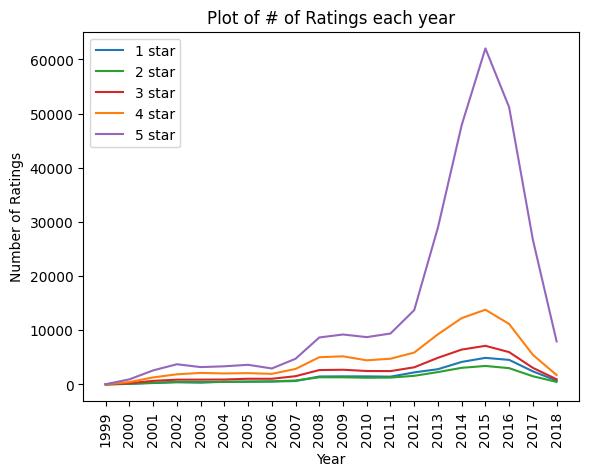

In [41]:
#This is for the Plot of the # of ratings each year
plt.plot(x, y1, color = 'tab:blue')
plt.plot(x, y2, color = 'tab:green')
plt.plot(x, y3, color = 'tab:red')
plt.plot(x, y4, color = 'tab:orange')
plt.plot(x, y5, color = 'tab:purple')
#plt.plot(x, yAvg)

plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.xticks(x, x, rotation = 'vertical') #makes it better to look at
plt.legend(['1 star', '2 star', '3 star', '4 star', '5 star'])
plt.title("Plot of # of Ratings each year")
plt.show()

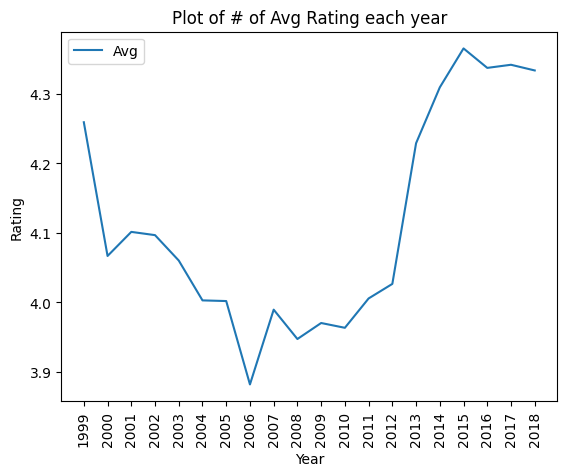

In [42]:
#plot of avg rating over the years
#This is for the Plot of the # of ratings each year
plt.plot(x, yAvg, color = 'tab:blue')

#plt.plot(x, yAvg)

plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(x, x, rotation = 'vertical') #makes it better to look at
plt.legend(['Avg'])
plt.title("Plot of # of Avg Rating each year")
plt.show()


#So from this plot we can see that avg rating given has decreased each year from 1999 to 2006 
#with a general trend of increasing after

#if anyone can figure out how to get min, max, and avg of values on a plot that would be great

In [43]:
#we need to change the data so its a percentage
totals = mainDf.groupby('reviewYear').count()
totals

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewLength,numWords
reviewYear,,,,,,,,,,,
1999,81,81,81,81,81,81,81,81,81,81,81
2000,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859
2001,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129
2002,7352,7352,7352,7352,7352,7352,7352,7350,7352,7352,7352
2003,6999,6999,6999,6999,6999,6999,6999,6998,6999,6999,6999
2004,7247,7247,7247,7247,7247,7247,7247,7247,7247,7247,7247
2005,7787,7787,7787,7787,7787,7787,7787,7786,7787,7787,7787
2006,7045,7045,7045,7045,7045,7045,7045,7043,7045,7045,7045
2007,10474,10474,10474,10474,10474,10474,10474,10474,10474,10474,10474


In [44]:
y1 = list(one['rating'] / totals['rating'])
print(y1)
y2 = list(two['rating'] / totals['rating'])
print(y2)
y3 = list(three['rating'] / totals['rating'])
print(y3)
y4 = list(four['rating'] / totals['rating'])
print(y4)
y5 = list(five['rating'] / totals['rating'])
print(y5)

yAvg = yAvg = list(avg  / 5.0)
print(yAvg)

[0.037037037037037035, 0.05325443786982249, 0.05069214271787873, 0.05359085963003264, 0.046578082583226176, 0.068718090244239, 0.06459483754976242, 0.07594038325053229, 0.06005346572465152, 0.07659329743294818, 0.0748268593797049, 0.08082676094642371, 0.07433307433307433, 0.08363444745558567, 0.058333333333333334, 0.0563554037199718, 0.05374694557368427, 0.05978318210592952, 0.06161270554590951, 0.0597153989496866]
[0.07407407407407407, 0.07638515330823023, 0.06180542015987522, 0.0647442872687704, 0.06529504214887841, 0.06388850558851938, 0.06742005907281366, 0.08005677785663591, 0.06883712048882948, 0.06880326240393161, 0.06594399277326106, 0.06722871906445471, 0.06537166537166537, 0.05984643179765131, 0.0472636815920398, 0.041578547801095385, 0.037376316279681354, 0.03961806288246465, 0.038555816566234295, 0.03972556327291208]
[0.04938271604938271, 0.1258741258741259, 0.1286800545915383, 0.12010337323177367, 0.12701814544934992, 0.12543121291568926, 0.13484011814562732, 0.14847409510

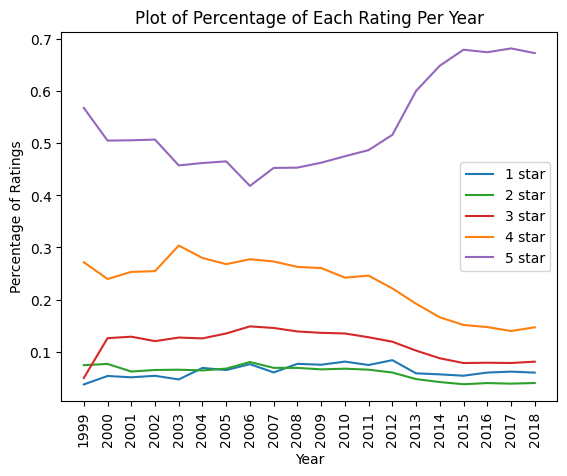

In [45]:
#This is for the Plot of the percentage of each rating each year. Its hard to read the rating otherwise
plt.plot(x, y1, color = 'tab:blue')
plt.plot(x, y2, color = 'tab:green')
plt.plot(x, y3, color = 'tab:red')
plt.plot(x, y4, color = 'tab:orange')
plt.plot(x, y5, color = 'tab:purple')
#plt.plot(x, yAvg, color = 'tab:brown')

#plt.plot(x, yAvg)

plt.xlabel("Year")
plt.ylabel("Percentage of Ratings")
plt.xticks(x, x, rotation = 'vertical') #makes it better to look at
plt.legend(['1 star', '2 star', '3 star', '4 star', '5 star', 'Average'])
plt.title("Plot of Percentage of Each Rating Per Year")
plt.show()

#from this plot we can see that the percentage of five stars has increased over the years resulting in an increase in the avg 

#so This concludes the first plot

histogram of rating with each review as stacked barplot
and we can do it both ways

what this means is that we can do a histogram based on the reviewLength between certain ranges to do that we will first decide draw a boxplot of the review lengths

In [46]:
mainDf['reviewLength'].max()

32721

count    497343.000000
mean        670.318963
std        1266.191356
min           1.000000
25%          57.000000
50%         210.000000
75%         710.000000
max       32721.000000
Name: reviewLength, dtype: float64

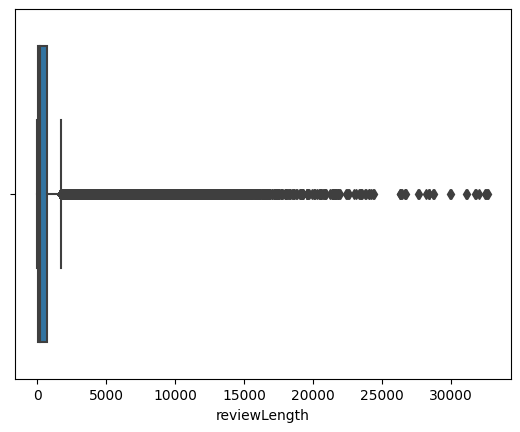

In [47]:
#first draw the boxplot
sns.boxplot(x='reviewLength', data=mainDf);
mainDf['reviewLength'].describe() #this doesnt seem so helpful for reviewLength.
#I'm instead going to get wordss since words are separated by spaces and it will help reduce the number a lot

In [48]:
mainDf.describe() #num words is way more useful than reviewLength

,rating,vote,reviewYear,reviewLength,numWords
count,497343.000000,497343.000000,497343.000000,497343.000000,497343.000000
mean,4.220329,2.309040,2012.851979,670.318963,122.701429
std,1.185478,17.137017,3.899879,1266.191356,227.005962
min,1.000000,0.000000,1999.000000,1.000000,1.000000
25%,4.000000,0.000000,2011.000000,57.000000,11.000000
50%,5.000000,0.000000,2014.000000,210.000000,40.000000
75%,5.000000,0.000000,2016.000000,710.000000,132.000000
max,5.000000,2474.000000,2018.000000,32721.000000,5928.000000


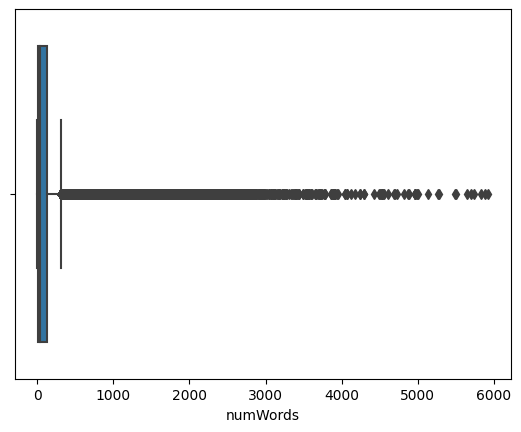

In [49]:
#now we will try this with the numWords instead
sns.boxplot(x='numWords', data=mainDf); #a lot of outliers but something we have to consider is that maybe reviews with 
#less than 10 words might not be that useful



In [50]:
#now we will determine outliers
lower, upper = np.percentile(mainDf['numWords'], [25, 75])
lower, upper





(11.0, 132.0)

In [51]:
# calculate IQR
iqr = upper - lower
iqr

121.0

Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers.  

In [52]:
# calculate lower cutoff
# values below this are outliers 
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers 
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

(-170.5, 313.5)

Boxplots really shine when you want to look at the range of typical values for a quantitative variable, _broken down by a separate categorical variable_.

count    497343.000000
mean        122.701429
std         227.005962
min           1.000000
25%          11.000000
50%          40.000000
75%         132.000000
max        5928.000000
Name: numWords, dtype: float64

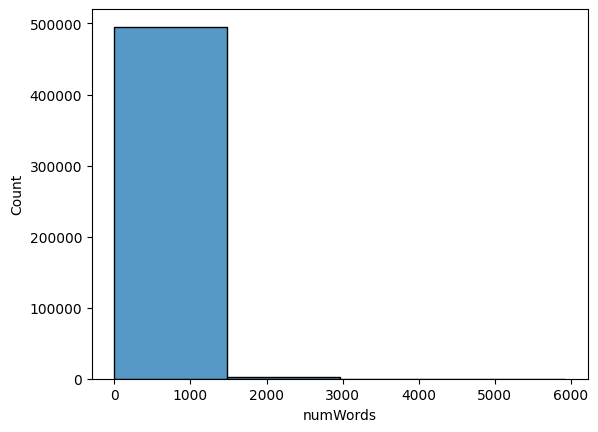

In [53]:
#Lets create a histogram to see how the data looks

sns.histplot(mainDf['numWords'], bins=4, kde=False);
mainDf['numWords'].describe()

In [54]:
#lets reduce the range of words

In [55]:
lower1, upper9 = np.percentile(mainDf['numWords'], [10, 94])
print(lower1, upper9)

2.0 469.0


In [56]:
upperNine = np.percentile(mainDf['numWords'], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
print (upperNine)

eightyFive = np.percentile(mainDf['numWords'], [85])
print(eightyFive)

[ 328.  356.  387.  425.  469.  525.  598.  694.  838. 1080. 5928.]
[231.]


In [57]:
#we notice that some reviews have either lots of words or not enough words so we will filter by having each review being above 10 words
#which is approx 25% and between 250 words. This between 1 sentence per review and a mini paragraph which is good

filteredDf = mainDf[mainDf['numWords'] > 10]
filteredDf #reduced the size of dataframe by 100,000 or about 20%


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21
...,...,...,...,...,...,...,...,...,...,...,...,...
497336,3.0,True,"05 20, 2017",A3JLLK1KJFD3BN,B01HFRICLE,A. Lai,This nostalgic game with updaged game play ele...,"special moves) looks great, plays awesome but ...",0,2017,259,47
497337,5.0,True,"07 1, 2017",A2NKYXCAGBGW7F,B01HGPUTCA,Snipun1,"This Work Great and easy to replace, I would n...",I plan on doing all my controllers this way now,0,2017,134,24
497340,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,0,2017,343,67
497341,4.0,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,I think I originally began playing Bioshock se...,"It's Okay, Nothing Profound",0,2018,4158,779


In [58]:
filteredDf = filteredDf[filteredDf['numWords'] < 250]
filteredDf #this reduced size to about 300k which means we filtered  nearly 40% of our data whihc is good

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21
...,...,...,...,...,...,...,...,...,...,...,...,...
497334,5.0,True,"06 19, 2017",AVOS4AN9YUGCL,B01HFRICLE,Jim Y,If you played and enjoyed River City Ransom on...,Nostalgic Fun,0,2017,169,34
497336,3.0,True,"05 20, 2017",A3JLLK1KJFD3BN,B01HFRICLE,A. Lai,This nostalgic game with updaged game play ele...,"special moves) looks great, plays awesome but ...",0,2017,259,47
497337,5.0,True,"07 1, 2017",A2NKYXCAGBGW7F,B01HGPUTCA,Snipun1,"This Work Great and easy to replace, I would n...",I plan on doing all my controllers this way now,0,2017,134,24
497340,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,0,2017,343,67


In [59]:
mainDf = filteredDf
mainDf.describe()

,rating,vote,reviewYear,reviewLength,numWords
count,306127.000000,306127.000000,306127.000000,306127.000000,306127.000000
mean,4.121701,1.431354,2012.458127,396.839648,74.207126
std,1.252762,7.380440,3.914801,331.224020,60.611877
min,1.000000,0.000000,1999.000000,38.000000,11.000000
25%,4.000000,0.000000,2011.000000,136.000000,26.000000
50%,5.000000,0.000000,2014.000000,272.000000,51.000000
75%,5.000000,0.000000,2015.000000,572.000000,107.000000
max,5.000000,741.000000,2018.000000,2952.000000,249.000000


In [60]:
mainDf.describe()

,rating,vote,reviewYear,reviewLength,numWords
count,306127.000000,306127.000000,306127.000000,306127.000000,306127.000000
mean,4.121701,1.431354,2012.458127,396.839648,74.207126
std,1.252762,7.380440,3.914801,331.224020,60.611877
min,1.000000,0.000000,1999.000000,38.000000,11.000000
25%,4.000000,0.000000,2011.000000,136.000000,26.000000
50%,5.000000,0.000000,2014.000000,272.000000,51.000000
75%,5.000000,0.000000,2015.000000,572.000000,107.000000
max,5.000000,741.000000,2018.000000,2952.000000,249.000000


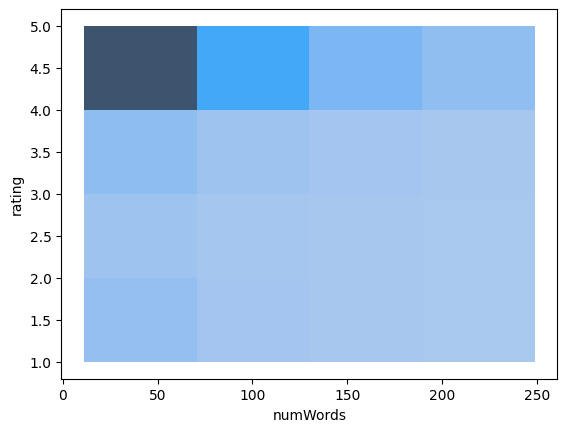

In [61]:
sns.histplot(x = mainDf['numWords'], y = mainDf['rating'], bins=4, kde=False);


In [62]:
smallerDf = mainDf[mainDf['numWords'] > 50]

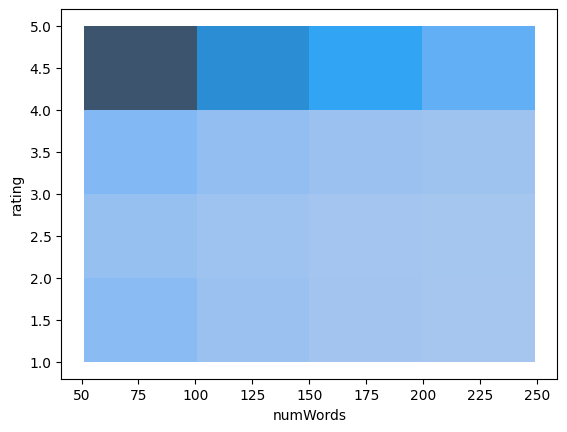

In [63]:
sns.histplot(x = smallerDf['numWords'], y = smallerDf['rating'], bins=4, kde=False);


In [64]:
#now we will rerun all plots

In [65]:
#Vote distribution

In [66]:
#Average votes based on review length

In [67]:
#Average votes based on rating

In [68]:
#Average votes based on verified status

In [69]:
#

In [70]:
print(mainDf.describe())  #we just remembered that the unixReviewTime is useless so we will drop these as well

              rating           vote     reviewYear   reviewLength  \
count  306127.000000  306127.000000  306127.000000  306127.000000   
mean        4.121701       1.431354    2012.458127     396.839648   
std         1.252762       7.380440       3.914801     331.224020   
min         1.000000       0.000000    1999.000000      38.000000   
25%         4.000000       0.000000    2011.000000     136.000000   
50%         5.000000       0.000000    2014.000000     272.000000   
75%         5.000000       0.000000    2015.000000     572.000000   
max         5.000000     741.000000    2018.000000    2952.000000   

            numWords  
count  306127.000000  
mean       74.207126  
std        60.611877  
min        11.000000  
25%        26.000000  
50%        51.000000  
75%       107.000000  
max       249.000000  


In [71]:
#mainDf = mainDf.drop(['unixReviewTime'], axis = 1)

In [72]:
print(mainDf.describe())  #overall is the rating so we will change that column name to reflect that

              rating           vote     reviewYear   reviewLength  \
count  306127.000000  306127.000000  306127.000000  306127.000000   
mean        4.121701       1.431354    2012.458127     396.839648   
std         1.252762       7.380440       3.914801     331.224020   
min         1.000000       0.000000    1999.000000      38.000000   
25%         4.000000       0.000000    2011.000000     136.000000   
50%         5.000000       0.000000    2014.000000     272.000000   
75%         5.000000       0.000000    2015.000000     572.000000   
max         5.000000     741.000000    2018.000000    2952.000000   

            numWords  
count  306127.000000  
mean       74.207126  
std        60.611877  
min        11.000000  
25%        26.000000  
50%        51.000000  
75%       107.000000  
max       249.000000  


In [73]:
mainDf.head()

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,reviewYear,reviewLength,numWords
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,2015,71,17
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,2015,297,66
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,0,2015,98,18
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,0,2014,58,12
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,0,2014,105,21


In [74]:
smallDf = mainDf.groupby(['reviewYear']).mean()
smallDf

,rating,verified,vote,reviewLength,numWords
reviewYear,,,,,
1999,4.315789,0.039474,10.947368,585.776316,104.973684
2000,4.077266,0.025260,6.028232,672.656761,123.179049
2001,4.088189,0.028609,2.873491,660.105512,122.018110
2002,4.049300,0.041051,2.421830,656.797621,121.189526
2003,4.042030,0.041159,2.746298,667.416812,123.172256
2004,3.953421,0.031870,3.389570,660.741030,122.400713
2005,3.967262,0.044643,3.921769,650.452806,121.065689
2006,3.862658,0.083148,4.399901,666.086860,123.441227
2007,4.025262,0.219958,4.265038,571.085415,106.000977


<AxesSubplot:xlabel='reviewYear'>

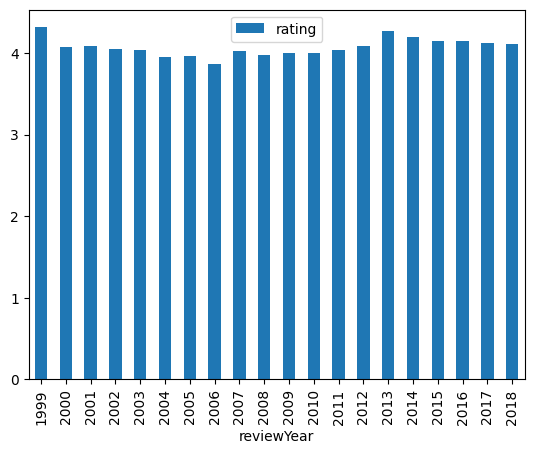

In [75]:
#plot between avg rating per year
smallDf.plot(y='rating',use_index='True',kind='bar')

<AxesSubplot:ylabel='reviewYear'>

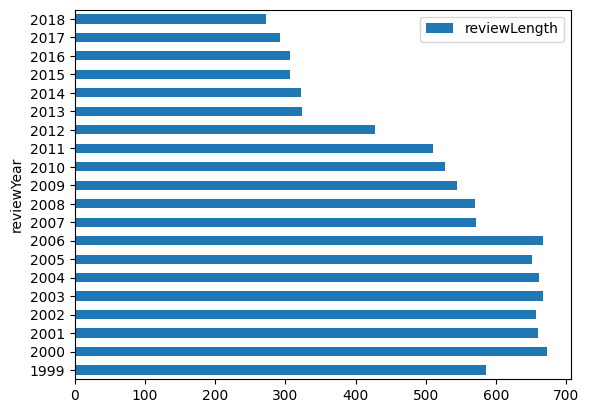

In [76]:
#plot of avg reveiwLengths per year 
smallDf.plot(y='reviewLength',use_index='True',kind='barh')

<AxesSubplot:ylabel='reviewYear'>

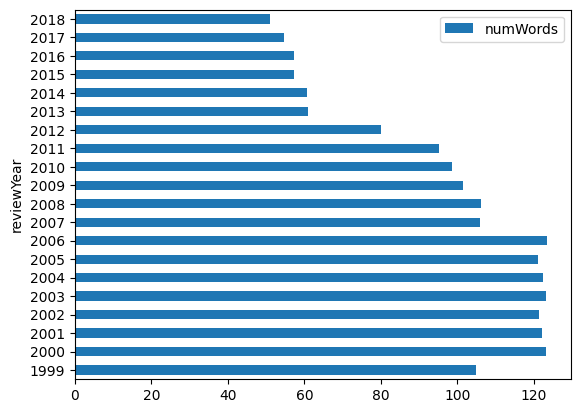

In [77]:
#plot of avg reveiwLengths per year 
smallDf.plot(y='numWords',use_index='True',kind='barh')

In [78]:
smallDfRAT = mainDf.groupby(['rating']).mean()
smallDfRAT

,verified,vote,reviewYear,reviewLength,numWords
rating,,,,,
1.0,0.482230,3.897074,2012.521931,433.011677,80.744937
2.0,0.542719,1.851644,2012.118089,493.936249,91.889001
3.0,0.621118,1.399037,2012.124193,465.231770,86.956553
4.0,0.626187,1.145156,2011.918217,452.814153,84.609580
5.0,0.705344,1.161104,2012.730505,350.561237,65.659425


<AxesSubplot:xlabel='rating'>

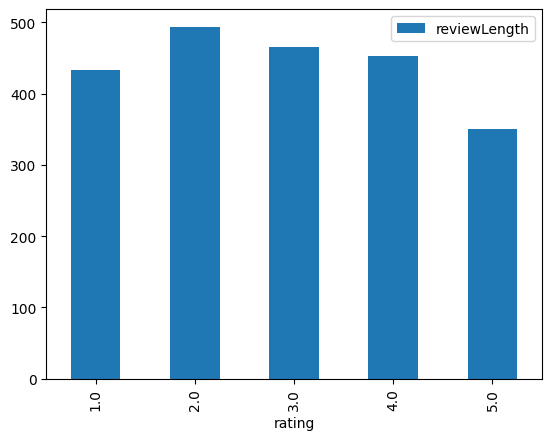

In [79]:
#plot of avg reveiwLengths per rating 
smallDfRAT.plot(y='reviewLength',use_index='True',kind='bar')

<AxesSubplot:xlabel='rating'>

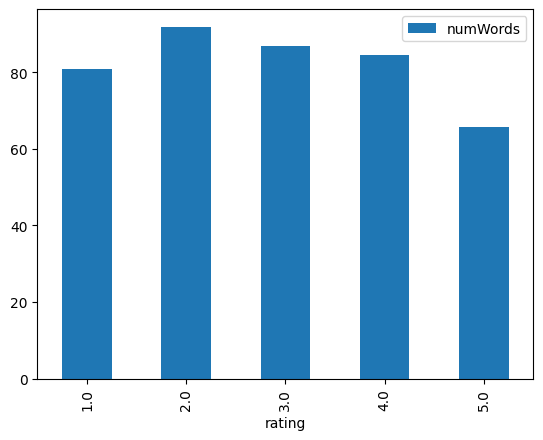

In [80]:
#plot of avg reveiwLengths per rating 
smallDfRAT.plot(y='numWords',use_index='True',kind='bar')

<AxesSubplot:xlabel='rating'>

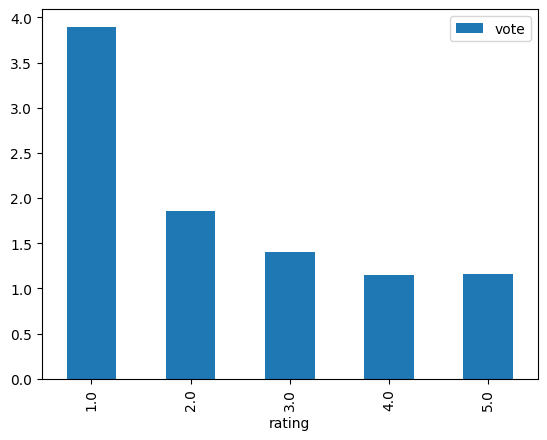

In [81]:
#plot of avg number of votes per rating 
smallDfRAT.plot(y='vote',use_index='True',kind='bar')
#here we can see that lower ratings recieve higher number of votes.

<AxesSubplot:>

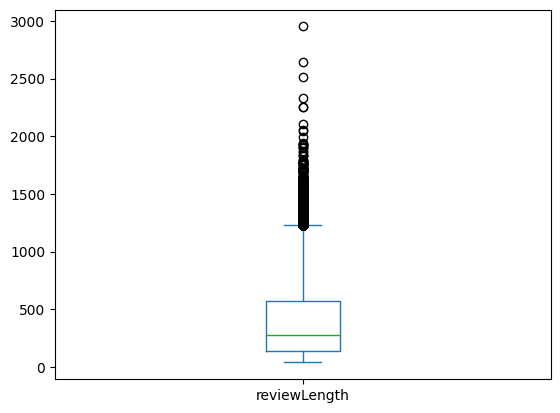

In [82]:
mainDf.plot(y='reviewLength',kind='box')

<AxesSubplot:>

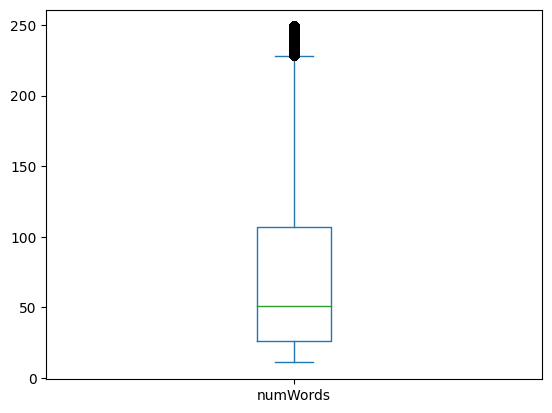

In [83]:
mainDf.plot(y='numWords',kind='box')

In [84]:
#from the plot above we see that we have reduced the number of outliers a lot and see a far better average number of words and iqr
#this looks about right for how a dataset should look like


In [85]:
#Now we have to create a baseline



In [86]:
mainDf.head()
newDf = mainDf[['reviewerID', 'asin', 'rating']] #user, itemid, rating
newDf.to_csv("video_game.csv.gz", 
           index=False, 
           compression="gzip")

In [87]:
#we will create the models now

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [90]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

In [91]:
def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        u,b,r = l.strip().split(',')
        r = float(r)
        yield u,b,r

In [92]:
ratingsTrain = []

allRatings = []
userRatings = defaultdict(list)

for user,review,r in readCSV("video_game.csv.gz"):
    r = float(r)
    allRatings.append((user,review,r))
    userRatings[user].append(r)

In [93]:
print(type(allRatings))

<class 'list'>


In [94]:

globalAverage = [r for u,b,r in allRatings]
globalAverage = sum(globalAverage) / len(globalAverage)
userAverage = {}
for u in userRatings:
    userAverage[u] = sum(userRatings[u]) / len(userRatings[u])
ratingsTrain = allRatings[:(8*len(mainDf)//10)]
ratingsValid = allRatings[(8*len(mainDf)//10):]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))
betaU = {}
betaI = {}
for u in ratingsPerUser:
    betaU[u] = 0

for b in ratingsPerItem:
    betaI[b] = 0

alpha = globalAverage # Could initialize anywhere, this is a guess

In [95]:
ratingsTrain = allRatings[:(8*len(mainDf)//10)]
ratingsValid = allRatings[(8*len(mainDf)//10):]
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [96]:
betaU = {}
betaI = {}
for u in ratingsPerUser:
    betaU[u] = 0

for b in ratingsPerItem:
    betaI[b] = 0

In [97]:
def iterate(lamb):
    newAlpha = 0
    for u,b,r in ratingsTrain:
        newAlpha += r - (betaU[u] + betaI[b])
    alpha = newAlpha / len(ratingsTrain)
    for u in ratingsPerUser:
        newBetaU = 0
        for b,r in ratingsPerUser[u]:
            newBetaU += r - (alpha + betaI[b])
        betaU[u] = newBetaU / (lamb + len(ratingsPerUser[u]))
    for b in ratingsPerItem:
        newBetaI = 0
        for u,r in ratingsPerItem[b]:
            newBetaI += r - (alpha + betaU[u])
        betaI[b] = newBetaI / (lamb + len(ratingsPerItem[b]))
    mse = 0
    for u,b,r in ratingsTrain:
        prediction = alpha + betaU[u] + betaI[b]
        mse += (r - prediction)**2
    regularizer = 0
    for u in betaU:
        regularizer += betaU[u]**2
    for b in betaI:
        regularizer += betaI[b]**2
    mse /= len(ratingsTrain)
    return mse, mse + lamb*regularizer

In [98]:
mse,objective = iterate(1)
newMSE,newObjective = iterate(1)
iterations = 2

In [99]:
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(1)
    iterations += 1
    print("Objective after "
        + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after "
        + str(iterations) + " iterations = " + str(newMSE))

Objective after 3 iterations = 21758.201687764733
MSE after 3 iterations = 0.7659537284448795
Objective after 4 iterations = 21695.663675421638
MSE after 4 iterations = 0.7657674787524091
Objective after 5 iterations = 21661.259441046066
MSE after 5 iterations = 0.7657784833962605
Objective after 6 iterations = 21640.186279670936
MSE after 6 iterations = 0.7658053306217307
Objective after 7 iterations = 21626.33688803147
MSE after 7 iterations = 0.7658230612939364
Objective after 8 iterations = 21616.57302894863
MSE after 8 iterations = 0.7658315754673587
Objective after 9 iterations = 21609.208571387306
MSE after 9 iterations = 0.7658339820668973
Objective after 10 iterations = 21603.321300361244
MSE after 10 iterations = 0.7658328346759671
Objective after 11 iterations = 21598.398353171477
MSE after 11 iterations = 0.7658297797066068
Objective after 12 iterations = 21594.148543461997
MSE after 12 iterations = 0.7658257928486031
Objective after 13 iterations = 21590.401817583246
MSE a

In [100]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.5464452479705488


In [101]:
iterations = 1
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(5)
    iterations += 1
    print("Objective after " + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after " + str(iterations) + " iterations = " + str(newMSE))

Objective after 2 iterations = 37082.24699273336
MSE after 2 iterations = 0.9001381351452469
Objective after 3 iterations = 36068.343782255535
MSE after 3 iterations = 0.9028042741208864
Objective after 4 iterations = 35960.13943379739
MSE after 4 iterations = 0.9032079707359678
Objective after 5 iterations = 35937.46497689897
MSE after 5 iterations = 0.9032918425719205
Objective after 6 iterations = 35929.6666295242
MSE after 6 iterations = 0.9033180422160918
Objective after 7 iterations = 35925.596893562535
MSE after 7 iterations = 0.9033303977714896
Objective after 8 iterations = 35922.84031836284
MSE after 8 iterations = 0.9033384415395003
Objective after 9 iterations = 35920.733743542405
MSE after 9 iterations = 0.9033446603833233
Objective after 10 iterations = 35919.044850990314
MSE after 10 iterations = 0.9033498116029656
Objective after 11 iterations = 35917.66533896188
MSE after 11 iterations = 0.9033541785183923
Objective after 12 iterations = 35916.52959454652
MSE after 12 

In [102]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.4900712993689362


In [103]:
iterations = 1
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(3)
    iterations += 1
    print("Objective after " + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after " + str(iterations) + " iterations = " + str(newMSE))

Objective after 2 iterations = 32769.42023273576
MSE after 2 iterations = 0.8440994958889599
Objective after 3 iterations = 32985.019856861065
MSE after 3 iterations = 0.8430256421443827
Objective after 4 iterations = 33020.148020319706
MSE after 4 iterations = 0.8428753266370465
Objective after 5 iterations = 33028.048390288815
MSE after 5 iterations = 0.8428414338479796
Objective after 6 iterations = 33030.506621909
MSE after 6 iterations = 0.8428302937344844
Objective after 7 iterations = 33031.566945935774
MSE after 7 iterations = 0.8428250649151533
Objective after 8 iterations = 33032.18580988759
MSE after 8 iterations = 0.8428217913826594
Objective after 9 iterations = 33032.635827595404
MSE after 9 iterations = 0.8428193377229417
Objective after 10 iterations = 33033.00618019093
MSE after 10 iterations = 0.8428173210964249


In [104]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.487167372244404


In [105]:
iterations = 1
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(7)
    iterations += 1
    print("Objective after " + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after " + str(iterations) + " iterations = " + str(newMSE))

Objective after 2 iterations = 36809.207240413
MSE after 2 iterations = 0.9499796499202888
Objective after 3 iterations = 36494.46733592334
MSE after 3 iterations = 0.950851953498327
Objective after 4 iterations = 36462.70613009686
MSE after 4 iterations = 0.9509698856281052
Objective after 5 iterations = 36454.6929728841
MSE after 5 iterations = 0.9509970944644035
Objective after 6 iterations = 36450.66688160606
MSE after 6 iterations = 0.951009794961643
Objective after 7 iterations = 36447.88684475378
MSE after 7 iterations = 0.9510186173308833
Objective after 8 iterations = 36445.773415575386
MSE after 8 iterations = 0.9510255627024333
Objective after 9 iterations = 36444.12244097248
MSE after 9 iterations = 0.9510311947243467
Objective after 10 iterations = 36442.82106179886
MSE after 10 iterations = 0.9510357831198594
Objective after 11 iterations = 36441.79101701528
MSE after 11 iterations = 0.951039516757418
Objective after 12 iterations = 36440.97355664934
MSE after 12 iteratio

In [106]:
validMSE = 0
for u,b,r in ratingsValid:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingsValid)
print("Validation MSE = " + str(validMSE))

Validation MSE = 1.5010460971916748


In [107]:
#from this we see our baseine is with the lambda = 3

In [108]:
N = len(ratingsTrain)
nUsers = len(ratingsPerUser)
nItems = len(ratingsPerItem)
users = list(ratingsPerUser.keys())
items = list(ratingsPerItem.keys())

In [109]:
alpha

4.121701124043289

In [110]:
userBiases = defaultdict(float)
itemBiases = defaultdict(float)

In [111]:
#The actual prediction function of our model is simple: Just predict using a global offset (alpha), 
#a user offset (beta_u in the slides), and an item offset (beta_i)


def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item]

We'll use another library in this example to perform gradient descent. This library requires that we pass it a "flat" parameter vector (theta) containing all of our parameters. This utility function just converts between a flat feature vector, and our model parameters, i.e., it "unpacks" theta into our offset and bias parameters.



In [112]:
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    alpha = theta[0]
    userBiases = dict(zip(users, theta[1:nUsers+1]))
    itemBiases = dict(zip(items, theta[1+nUsers:]))

In [113]:
#The "cost" function is the function we are trying to optimize. 
#Again this is a requirement of the gradient descent library we'll use. 
#In this case, we're just computing the (regularized) MSE of a particular solution (theta), and returning the cost.

def cost(theta, labels, lamb):
    unpack(theta)
    predictions = []
    for u,b,r in ratingsTrain:
        predictions.append(prediction(u,b))
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in userBiases:
        cost += lamb*userBiases[u]**2
    for i in itemBiases:
        cost += lamb*itemBiases[i]**2
    return cost

In [114]:
#The derivative function is the most difficult to implement, but follows the definitions of the derivatives for this model as given in the lectures. 
#This step could be avoided if using a gradient descent implementation based on (e.g.) Tensorflow.

def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(dataset)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    for u,b,r in ratingsTrain:
        #u,i = d['customer_id'], d['product_id']
        pred = prediction(u, b)
        diff = pred - r
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[b] += 2/N*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
    for i in itemBiases:
        dItemBiases[i] += 2*lamb*itemBiases[i]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    return numpy.array(dtheta)

In [135]:
MSE(alwaysPredictMean, labels)


1.567742216703212

In [137]:
import scipy

In [138]:
x,f,d  = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems),
                             derivative, args = (labels, 0.001))


MSE = 1.567742216703212
MSE = 2.0727910149554383
MSE = 1.56776749327349
MSE = 1.5677428822453525
MSE = 1.5677422259339764
MSE = 1.5677422131995098
MSE = 1.567742217037797
MSE = 1.5677422125328415
MSE = 1.5677422142684614
MSE = 1.5677422124995595
MSE = 1.5677422133313779
MSE = 1.5677422125665774
MSE = 1.5677422124995595
MSE = 1.5682065590214829
MSE = 1.5677498198119928
MSE = 1.567742450311782
MSE = 1.5677422119414353
MSE = 1.5677422101710028
MSE = 1.5677422094887314
MSE = 1.5677422108936074
MSE = 1.5677422097157188
MSE = 1.5677422094887314


In [119]:
print(x)
print(type(x))
print(len(x))
print(d)
print(type(d))
print(len(d))
print (f)
print(type(f))
#print(len(f))
print(d['task']) 
print(d['grad']) #gradient at teh minimum idk how to use this

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
<class 'list'>
20
{'overall': 2.0, 'verified': True, 'reviewTime': '03 13, 2018', 'reviewerID': 'A6W81WTFK940B', 'asin': 'B01HIZGKOE', 'reviewerName': 'msam420', 'reviewText': "The graphics are terrible, it looks like ps2 graphics, the flight controls aren't all that good. The platinum trophy for Air Conflicts: Vietnam is unachievable, as it requires online play which nobody appears to be playing this game online", 'summary': 'Not as good as I expected it to be', 'unixReviewTime': 1520899200}
<class 'dict'>
9
<gzip _io.BufferedReader name='Video_Games_5.json.gz' 0x1d7220e2608>
<class 'gzip.GzipFile'>


KeyError: 'task'

In [120]:
#our simple latent factor based recommender didnt improve the mse  by much if at all. This is
#predicting using = alpha + B_u + B_i. The simplest model possible is alpha and this is an improvement.

In [121]:
#next we create a complete latent factor model

In [139]:
userBiases = defaultdict(float)
itemBiases = defaultdict(float)


In [140]:
userGamma = {}
itemGamma = {}

In [141]:
K= 2

In [142]:
for u in ratingsPerUser:
    userGamma[u] = [random.random() * 0.1 - 0.05 for k in range(K)]
for i in ratingsPerItem:
    itemGamma[i] = [random.random() * 0.1 - 0.05 for k in range(K)]

In [143]:
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    global userGamma
    global itemGamma
    index = 0
    alpha = theta[index]
    index += 1
    userBiases = dict(zip(users, theta[index:index+nUsers]))
    index += nUsers
    itemBiases = dict(zip(items, theta[index:index+nItems]))
    index += nItems
    for u in users:
        userGamma[u] = theta[index:index+K]
        index += K
    for i in items:
        itemGamma[i] = theta[index:index+K]
        index += K

In [144]:
def inner(x, y):
    return sum([a*b for a,b in zip(x,y)])

In [145]:
def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item] + inner(userGamma[user], itemGamma[item])

In [146]:
def cost(theta, labels, lamb):
    unpack(theta)
    predictions = []
    for u,b,r in ratingsTrain:
        predictions.append(prediction(u,b))
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in users:
        cost += lamb*userBiases[u]**2
        for k in range(K):
            cost += lamb*userGamma[u][k]**2
    for i in items:
        cost += lamb*itemBiases[i]**2
        for k in range(K):
            cost += lamb*itemGamma[i][k]**2
    return cost

In [147]:
def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(dataset)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    dUserGamma = {}
    dItemGamma = {}
    for u in ratingsPerUser:
        dUserGamma[u] = [0.0 for k in range(K)]
    for i in ratingsPerItem:
        dItemGamma[i] = [0.0 for k in range(K)]
    for u, b, r in ratingsTrain: #before it was iterating the allRatings whihc was why there were errors and why mse was so large
        #u,i = d['customer_id'], d['product_id']
        pred = prediction(u, b)
        diff = pred - r
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[i] += 2/N*diff
        for k in range(K):
            dUserGamma[u][k] += 2/N*itemGamma[i][k]*diff
            dItemGamma[i][k] += 2/N*userGamma[u][k]*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
        for k in range(K):
            dUserGamma[u][k] += 2*lamb*userGamma[u][k]
    for i in itemBiases:
        dItemBiases[i] += 2*lamb*itemBiases[i]
        for k in range(K):
            dItemGamma[i][k] += 2*lamb*itemGamma[i][k]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    for u in users:
        dtheta += dUserGamma[u]
    for i in items:
        dtheta += dItemGamma[i]
    return numpy.array(dtheta)

In [148]:
MSE(alwaysPredictMean, labels)

1.567742216703212

In [149]:
N = len(dataset)
nUsers = len(ratingsPerUser)
nItems = len(ratingsPerItem)
users = list(ratingsPerUser.keys())
items = list(ratingsPerItem.keys())

In [150]:
x,f,d = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + # Initialize alpha
                                   [0.0]*(nUsers+nItems) + # Initialize beta
                                   [random.random() * 0.1 - 0.05 for k in range(K*(nUsers+nItems))], # Gamma
                             derivative, args = (labels, 0.001))

KeyError: 'AOV56JJHXDFEO'

In [ ]:
print(x)
print(type(x))
print(len(x))
print(d)
print(type(d))
print(len(d))
print (f)
print(type(f))
#print(len(f))
print(d['task']) 
print(d['grad']) #gradient at teh minimum idk how to use this

In [151]:
#the complete latent factor model improved the mse a lot more with a 1.35 mse but isnt quite what we could do

In [153]:
answers = {}

In [154]:
allRatings = []
for l in readCSV("video_game.csv.gz"): #this is what we have to predict on different from the model we are given
    allRatings.append(l)

In [155]:
print(len(allRatings))
#print(allRatings[:100]) #3 values (u,b,r)
for u,b,r in allRatings[:100]:
    #print(r)
    pass

306127


In [156]:
#given

ratingTrain, ratingTest = train_test_split(allRatings,test_size=0.2)
print(len(ratingTrain), len(ratingTest))


244901 61226


In [157]:
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for u,b,r in ratingTrain: #u is user, b is item, and r is rating and they are in that order
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [158]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [159]:
#repurposed code to fit here
#N = len(allRatings)
N= len(ratingTrain) #this was the error the N was too large
nUsers = len(ratingsPerUser)
nItems = len(ratingsPerItem)
users = list(ratingsPerUser.keys())
items = list(ratingsPerItem.keys())

In [160]:
globalAverage = np.sum(r for u,b,r in ratingTrain)
globalAverage = globalAverage/len(ratingTrain)
print(globalAverage)
alpha = globalAverage

4.121616489928583


In [161]:
#construct the b user and bitem like before
bUser = defaultdict(float)
bItem = defaultdict(float)
alwaysPredictMean = [globalAverage for u,b,r in ratingTrain]
labels = [r for u, b, r in ratingTrain]


In [162]:
#We'll use another library in this example to perform gradient descent. 
#This library requires that we pass it a "flat" parameter vector (theta) containing all of our parameters.
#This utility function just converts between a flat feature vector, and our model parameters, 
#i.e., it "unpacks" theta into our offset and bias parameters.

def unpack(theta):
    global alpha
    global bUser
    global bItem
    bUser = defaultdict(float)
    bItem = defaultdict(float)
    alpha = theta[0]
    bUser = dict(zip(users, theta[1:nUsers+1])) 
    bItem = dict(zip(items, theta[1+nUsers:]))

In [163]:
#The actual prediction function of our model is simple: 
#Just predict using a global offset (alpha), a user offset (beta_u in the slides), and an item offset (beta_i)

def prediction(user, item):
    if (user not in bUser.keys() ):
        bUser[user] = 0
    if ( item not in bItem.keys() ):
        bItem[item] = 0
    t1 = bUser[user] 
    t2 = bItem[item]
    return alpha + t1 + t2

In [164]:
alwaysPredictMean = [globalAverage for u,b,r in ratingTrain]
labels = [r for u, b, r in ratingTrain]


In [165]:
#The "cost" function is the function we are trying to optimize. 
#Again this is a requirement of the gradient descent library we'll use.
#In this case, we're just computing the (regularized) MSE of a particular solution (theta), and returning the cost.


def cost(theta, labels, lamb):
    unpack(theta) #this fills up the bUser, bItem, alpha
    predictions = []
    for u,b,r in ratingTrain:
        predictions.append(prediction(u,b))
   
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in bUser:
        cost += lamb*bUser[u]**2
    for i in bItem:
        cost += lamb*bItem[i]**2
    return cost

The derivative function is the most difficult to implement, but follows the definitions of the derivatives for this model as given in the lectures. This step could be avoided if using a gradient descent implementation based on (e.g.) Tensorflow.



In [166]:
#not tensforflow model
def derivativeNotTensor(theta, labels, lamb):
    unpack(theta)
    #print(bUser['u96558248'])
    #bUser['u96558248'] = 0
    N = len(ratingTrain)
    dalpha = 0
    dUserBiases = defaultdict(float) #we can maybe improve this by using the equations in 
    dItemBiases = defaultdict(float)
    for u, b, r in ratingTrain: #before it was iterating the allRatings whihc was why there were errors and why mse was so large
        #u,i = d['customer_id'], d['product_id']
        pred = prediction(u, b)
        diff = pred - r
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[b] += 2/N*diff
    for u in bUser:
        dUserBiases[u] += 2*lamb*bUser[u]
    for i in bItem:
        dItemBiases[b] += 2*lamb*bItem[i]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    
    return np.array(dtheta)


In [167]:
alwaysPredictMean = [globalAverage for u,b,r in ratingTrain]
labels = [r for u, b, r in ratingTrain]

#Compute the MSE of a trivial baseline (always predicting the mean) for comparison:

MSE(alwaysPredictMean, labels)




1.5700130847312572

In [168]:
#print(bUser['u96558248'])

print(type([alpha] + [0.0]*(nUsers+nItems)))
#print([alpha] + [0.0]*(nUsers+nItems)) #this is the x0ndarray or the initial guess
#in https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html

#cost is the func to minimize.
#derivativeNotTensor is the fprime callable 

# (labels, 0.001) is the Arguments to pass to func and fprime
#the arguements for cost and derivatives are theta, labels, lamb. Idk what theta is here but we have labels
#print((labels, 1))
print(type((labels, 1)))

<class 'list'>
<class 'tuple'>


In [169]:
#now we use scipy to optomize for us
''''x, f, d = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems),
                             derivativeNotTensor, args = (labels, 0.001))'''

"'x, f, d = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems),\n                             derivativeNotTensor, args = (labels, 0.001))"

In [170]:
#this took very long to run. I keep ending up with this werid mse over here of 1.74 to 1.686. But i figured out the error
#its cuz im doing over all the ratings instead of ratingTrain whihc composes the ratingPerUser and etc. Thats why i got
#errors of why im not getting the right values here and there

#also running it twice by accident made it better and close to my second value which i dont know how to explain

#it beat the baseline by like 0.06 which is okay

In [171]:
alpha = globalAverage
userBiases = defaultdict(float)
itemBiases = defaultdict(float)

#For each user and item we now have a low dimensional descriptor 
#(representing that user's preferences, and that item's properties), of dimension K.


userGamma = {}
itemGamma = {}

#repurposed code to fit here
#N = len(allRatings)
N= len(ratingTrain) #this was the error the N was too large
nUsers = len(ratingsPerUser)
nItems = len(ratingsPerItem)
users = list(ratingsPerUser.keys())
items = list(ratingsPerItem.keys())

lamda = 0.0000235
randomizer = 0.000001 #previous was  0.000002

In [172]:
K = 1 #try different k values, the lower the better according to prof notes on assignment1 notes
for u in ratingsPerUser:
    userGamma[u] = [random.random() * randomizer - 0.05 for k in range(K)] #play around with teh random
print(len(userGamma))

46799


In [173]:
for i in ratingsPerItem:
    itemGamma[i] = [random.random() * randomizer - 0.05 for k in range(K)]
print(len(itemGamma))

17263


In [174]:
#create these for now

alwaysPredictMean = [globalAverage for u,b,r in ratingTrain]
labels = [r for u, b, r in ratingTrain]

In [175]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [176]:
def#Again we must implement an "unpack" function. 
#This is the same as before, though has some additional terms.


def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    global userGamma
    global itemGamma
    index = 0
    alpha = theta[index]
    index += 1
    userBiases = dict(zip(users, theta[index:index+nUsers]))
    index += nUsers
    itemBiases = dict(zip(items, theta[index:index+nItems]))
    index += nItems
    for u in users:
        userGamma[u] = theta[index:index+K]
      def  index += K
    for i in items:
        itemGamma[i] = theta[index:index+K]
        index += K

In [177]:
#Similarly, our cost and derivative functions serve the same role as before, 
#though their implementations are somewhat more complicated.

def inner(x, y): #this is for the regularizer y_i *y_u
    return sum([a*b for a,b in zip(x,y)])

In [178]:
def prediction(user, item): #we need to account for the regularizer now
    return alpha + userBiases[user] + itemBiases[item] + inner(userGamma[user], itemGamma[item])

In [179]:
def cost(theta, labels, lamb):
    unpack(theta)
    predictions = []
    for u,b,r in ratingTrain:
        predictions.append(prediction(u,b))
    #just a convenient location to put this its the same as teh optimizer
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    
    '''
    for u in users:
        cost += lamb*userBiases[u]**2
        for k in range(K):
            cost += lamb*userGamma[u][k]**2
    for i in items:
        cost += lamb*itemBiases[i]**2
        for k in range(K):
            cost += lamb*itemGamma[i][k]**2
            
    return cost
    '''
    
    #to improve the cost we are going to implement the regularizer formula from lecture slide 92 on recommendations slide
    regularizer = 0
    for u in users:
        regularizer += userBiases[u] ** 2 #this the B_u ** 2
        for k in range (K): #instead of i its K because thats the dimensionality of the model
            regularizer += userGamma[u][k] ** 2 #this is the y_u **2
    for i in items:
        regularizer += itemBiases[i] ** 2 #this is the B_i **2
        for k in range (K):
            regularizer += itemGamma[i][k] ** 2 #this is the y_i **2
    
    
    #just like the professor did regurn the optimizer
    optimizer = cost + regularizer * lamb #its regularizer * lamda + cost
    return optimizer
            
    

In [180]:
def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(ratingTrain)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    dUserGamma = {} #new 
    dItemGamma = {} #new
    for u in ratingsPerUser:
        dUserGamma[u] = [0.0 for k in range(K)]
    for i in ratingsPerItem:
        dItemGamma[i] = [0.0 for k in range(K)]
    for u,i, r in ratingTrain:
        pred = prediction(u, i)
        diff = pred - r
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[i] += 2/N*diff
        for k in range(K):
            dUserGamma[u][k] += 2/N*itemGamma[i][k]*diff
            dItemGamma[i][k] += 2/N*userGamma[u][k]*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
        for k in range(K):
            dUserGamma[u][k] += 2*lamb*userGamma[u][k]
    for i in itemBiases:
        dItemBiases[i] += 2*lamb*itemBiases[i]
        for k in range(K):
            dItemGamma[i][k] += 2*lamb*itemGamma[i][k]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    for u in users:
        dtheta += dUserGamma[u]
    for i in items:
        dtheta += dItemGamma[i]
    return np.array(dtheta)

In [181]:
#Again we optimize using our gradient descent library, and compare to a simple baseline.

MSE(alwaysPredictMean, labels)


1.5700130847312572

In [182]:
import scipy

In [183]:
scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + # Initialize alpha
                                   [0.0]*(nUsers+nItems) + # Initialize beta
                                   [random.random() * 0.1 - 0.05 for k in range(K*(nUsers+nItems))], # Gamma
                             derivative, args = (labels, 0.001))

MSE = 1.5700092261475227
MSE = 1.554880606957865
MSE = 6.228971209778193
MSE = 1.5543110485899991
MSE = 1.4827405258667998
MSE = 1.472564074288656
MSE = 1.459380098933606
MSE = 1.4592909610453484
MSE = 1.461201733556338
MSE = 1.4616795327328846
MSE = 1.4618303389524216


(array([ 4.11089257e+00, -1.24292522e-02,  3.12356154e-02, ...,
         3.35292512e-06, -9.37689738e-06,  3.34084801e-06]),
 1.5079036557717074,
 {'grad': array([-4.34283705e-06, -2.77185384e-08,  7.20914794e-08, ...,
          6.64742522e-09, -1.86786700e-08,  6.77298036e-09]),
  'task': 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 11,
  'nit': 9,
  'warnflag': 0})

In [184]:
x, f, d = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + # Initialize alpha
                                   [0.0]*(nUsers+nItems) + # Initialize beta
                                   [random.random() * randomizer - 0.05 for k in range(K*(nUsers+nItems))], # Gamma
                             derivative, args = (labels, lamda), maxiter=40) #the lower the lamda the better the valuefor some reason, its improving too much
#limit the number of iterations using maxiter
#when i increased the lamda to 1 it suffers immensely,

#so i had mse of 1.50 for 0.00001 and 1.51 for 0.000001 so  i will try the value in between 0.0001 which was 1.53

MSE = 1.570080718215417
MSE = 1.958135406228314
MSE = 1.5696841914520725
MSE = 1.5692199878323252
MSE = 1.567373480444493
MSE = 1.5601523629082439
MSE = 1.5339063926924583
MSE = 1.4048922702493856
MSE = 1.3446204392951755
MSE = 1.226973604898881
MSE = 1.152301040246522
MSE = 1.098005834743642
MSE = 1.074310497495036
MSE = 1.0394417781203247
MSE = 0.994844523292587
MSE = 0.9496564089906697
MSE = 0.9423435572271297
MSE = 0.9567345844067332
MSE = 0.9415486820213799
MSE = 0.9447614049976718
MSE = 0.945365742887944
MSE = 0.9460264579380561
MSE = 0.943505324354184
MSE = 0.9398647621126008
MSE = 0.9328923101380264
MSE = 0.9369014389103077
MSE = 0.9319704715832949
MSE = 0.927420751013469
MSE = 0.9249797472914237
MSE = 0.9369717315857965
MSE = 0.9262197690305466
MSE = 0.9283249960245209
MSE = 0.9263358054725116
MSE = 0.9259373098922488
MSE = 0.9251056259995415
MSE = 0.9241630451031755
MSE = 0.9211016668094701
MSE = 0.9161896142445514
MSE = 0.9082082910055419
MSE = 0.9086454591775283
MSE = 0.906

In [185]:
#lets check the values we calculated before
print(len(userBiases))
print(len(itemBiases))
print(type(userBiases))

46799
17263
<class 'dict'>


In [186]:
print(x)
print(type(x))
print(len(x))
print(d)
print(type(d))
print(len(d))
print (f)
print(type(f))
#print(len(f))
print(d['task']) 
print(d['grad']) #gradient at teh minimum idk how to use this

[ 4.04807467e+00 -1.08535269e-01  3.54295877e-01 ...  1.91331456e-03
  1.46084527e-04  2.36617690e-03]
<class 'numpy.ndarray'>
128125
{'grad': array([2.78141883e-04, 2.50688086e-06, 4.03948394e-07, ...,
       1.81806129e-07, 3.38688279e-07, 1.41926113e-07]), 'task': 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT', 'funcalls': 51, 'nit': 40, 'warnflag': 1}
<class 'dict'>
5
1.0717477443219317
<class 'numpy.float64'>
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
[2.78141883e-04 2.50688086e-06 4.03948394e-07 ... 1.81806129e-07
 3.38688279e-07 1.41926113e-07]


In [281]:
#lets create the surprise model
import gzip
import random
import scipy
import tensorflow as tf
from collections import defaultdict
from implicit import bpr
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split

In [282]:
newDf.head()
#print(list(newDf['rating']))

newDf['rating'] = [int(r) for r in list(newDf['rating'])]
print(list(newDf['rating']))


[5, 4, 2, 5, 4, 1, 5, 5, 4, 4, 1, 5, 5, 4, 1, 5, 4, 4, 2, 1, 1, 2, 5, 1, 2, 4, 3, 5, 4, 1, 1, 4, 1, 3, 1, 4, 5, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 3, 4, 5, 5, 5, 3, 5, 1, 4, 5, 1, 5, 5, 4, 2, 5, 4, 4, 5, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 4, 5, 5, 5, 1, 4, 5, 3, 5, 5, 2, 4, 3, 2, 5, 2, 1, 5, 5, 1, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 5, 5, 1, 4, 5, 2, 1, 2, 5, 5, 3, 5, 5, 5, 4, 5, 5, 5, 4, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 3, 5, 3, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 1, 5, 4, 3, 3, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 3, 1, 5, 5, 3, 5, 3, 5, 5, 1, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 3, 5, 5, 4, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 1, 4, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 1, 3, 4, 4, 4, 4, 4, 5, 4, 1, 1, 3, 5, 5, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 

In [283]:
newDf.to_csv("video_game.tsv", 
            sep="\t",
            index = False)

In [284]:
reader = Reader(line_format='user item rating', sep='\t')


In [286]:
data = Dataset.load_from_file("video_game.tsv", reader=reader)


In [295]:
trainset, testset = train_test_split(data, test_size=.2)


In [292]:
newDf.head()

,reviewerID,asin,rating
0,A1HP7NVNPFMA4N,0700026657,5
1,A1JGAP0185YJI6,0700026657,4
3,A2204E1TH211HT,0700026657,2
4,A2RF5B5H74JLPE,0700026657,5
5,A11V6ZJ2FVQY1D,0700026657,4


In [293]:
model = SVD()


In [294]:
print(ratingTrain[:3])

[('A9LJ57L6Q2P84', 'B00005R5PO', 5.0), ('A1UNJ46NSB352E', 'B00006LU9L', 4.0), ('A3I6S2X9TQHL2Q', 'B00CXCCH1I', 3.0)]


In [296]:
model.fit(trainset)
predictions = model.test(testset)
predictions[0].est
sse = 0
for p in predictions:
    sse += (p.r_ui - p.est)**2

print(sse / len(predictions))

1.1935179998086383


In [196]:
#Now we are going to implement the Tensor Flow Model

In [197]:
#ideas for improvement are adding sentiment to a model. Using this we can then do baysian and also instance reweighting in lecture
#recommendations

In [198]:
newDf.head()

,reviewerID,asin,rating
0,A1HP7NVNPFMA4N,0700026657,5
1,A1JGAP0185YJI6,0700026657,4
3,A2204E1TH211HT,0700026657,2
4,A2RF5B5H74JLPE,0700026657,5
5,A11V6ZJ2FVQY1D,0700026657,4


In [199]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [200]:
userIDs = {}
itemIDs = {}
interactions = []

for d in readCSV("video_game.csv.gz"):
    #print(d)

    u = d[0]
    i = d[1]
    r = d[2]
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)
    interactions.append((u,i,r))


In [201]:
random.shuffle(interactions)
len(interactions)

306127

In [222]:
nTrain = int(len(interactions) * 0.8)
nTest = len(interactions) - nTrain
interactionsTrain = interactions[:nTrain]
interactionsTest = interactions[nTrain:]

print(len(interactionsTrain))
print(len(interactionsTest))

244901
61226


In [223]:
itemsPerUser = defaultdict(list)
usersPerItem = defaultdict(list)
for u,i,r in interactionsTrain:
    itemsPerUser[u].append(i)
    usersPerItem[i].append(u)

In [224]:
mu = sum([r for _,_,r in interactionsTrain]) / len(interactionsTrain)


In [225]:
#Gradient descent optimizer, could experiment with learning rate

optimizer = tf.keras.optimizers.Adam(0.1)


In [226]:
aclass LatentFactorModel(tf.keras.Model):
    def __init__(self, mu, K, lamb):
        super(LatentFactorModel, self).__init__()
        # Initialize to average
        self.alpha = tf.Variable(mu)
        # Initialize to small random values
        self.betaU = tf.Variable(tf.random.normal([len(userIDs)],stddev=0.001))
        self.betaI = tf.Variable(tf.random.normal([len(itemIDs)],stddev=0.001))
        self.gammaU = tf.Variable(tf.random.normal([len(userIDs),K],stddev=0.001))
        self.gammaI = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        self.lamb = lamb

    # Prediction for a single instance (useful for evaluation)
    def predict(self, u, i):
        p = self.alpha + self.betaU[u] + self.betaI[i] +\
            tf.tensordot(self.gammaU[u], self.gammaI[i], 1)
        return p

    # Regularizer
    def reg(self):
        return self.lamb * (tf.reduce_sum(self.betaU**2) +\
                            tf.reduce_sum(self.betaI**2) +\
                            tf.reduce_sum(self.gammaU**2) +\
                            tf.reduce_sum(self.gammaI**2))
    
    # Prediction for a sample of instances
    def predictSample(self, sampleU, sampleI):
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        beta_u = tf.nn.embedding_lookup(self.betaU, u)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        gamma_u = tf.nn.embedding_lookup(self.gammaU, u)
        gamma_i = tf.nn.embedding_lookup(self.gammaI, i)
        pred = self.alpha + betaa_u + beta_i +\
               tf.reduce_sum(tf.multiply(gamma_u, gamma_i), 1)
        return pred
    
    # Loss
    def call(self, sampleU, sampleI, sampleR):
        pred = self.predictSample(sampleU, sampleI)
        r = tf.convert_to_tensor(sampleR, dtype=tf.float32)
        return tf.nn.l2_loss(pred - r) / len(sampleR)

In [227]:
#Initialize the model. Could experiment with number of factors and regularization rate.

modelLFM = LatentFactorModel(mu, 5, 0.00001)


In [228]:
#Training step (for the batch-based model from Chapter 5)



In [252]:
def trainingStep(model, interactions):
    Nsamples = 50000
    with tf.GradientTape() as tape:
        sampleU, sampleI, sampleR = [], [], []
        for _ in range(Nsamples):
            u,i,r = random.choice(interactions)
            sampleU.append(userIDs[u])
            sampleI.append(itemIDs[i])
            sampleR.append(r)

        loss = model(sampleU,sampleI,sampleR)
        loss += model.reg()
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients((grad, var) for
                              (grad, var) in zip(gradients, model.trainable_variables)
                              if grad is not None)
    return loss.numpy()

In [230]:
#Run 100 iterations (really 100 batches) of gradient descent

for i in range(100):
    obj = trainingStep(modelLFM, interactionsTrain)
    if (i % 10 == 9): print("iteration " + str(i+1) + ", objective = " + str(obj))

iteration 10, objective = 0.58815163
iteration 20, objective = 0.54764354
iteration 30, objective = 0.53823876
iteration 40, objective = 0.5347813
iteration 50, objective = 0.5301148
iteration 60, objective = 0.52699673
iteration 70, objective = 0.5194075
iteration 80, objective = 0.5218923
iteration 90, objective = 0.51516503
iteration 100, objective = 0.51874334


In [232]:
u,i,r = interactionsTest[0]


In [233]:
modelLFM.predict(userIDs[u], itemIDs[i]).numpy()


4.6333175

In [234]:
predictions = []

In [235]:
for u, i, r in interactionsTest:
    predictions.append(modelLFM.predict(userIDs[u], itemIDs[i]).numpy())


In [236]:
print(len(predictions))

61226


In [237]:
print(predictions[:10])

[4.6333175, 3.5904098, 3.6115181, 3.551948, 5.077181, 4.378905, 4.2149487, 3.1051075, 4.4600496, 4.6220517]


In [239]:
print(len(labels))
print(labels[:10])

244901
[5.0, 4.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0]


In [240]:
trainLabels = [r for u, b, r in ratingTest]

In [241]:
print(len(trainLabels))

61226


In [242]:
MSE(prediction, trainLabels)

TypeError: zip argument #1 must support iteration

In [247]:
print(prediction)

<function prediction at 0x000001D78E528798>


In [248]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions,trainLabels)

1.9561106770463677

In [250]:
#so from the above we see the Tensorflow Model didnt perform that well with the usual settings interestingly so we are going
#to mess around with the parameters

In [251]:
optimizer = tf.keras.optimizers.Adam(0.001)


In [253]:
aclass LatentFactorModel(tf.keras.Model):
    def __init__(self, mu, K, lamb):
        super(LatentFactorModel, self).__init__()
        # Initialize to average
        self.alpha = tf.Variable(mu)
        # Initialize to small random values
        self.betaU = tf.Variable(tf.random.normal([len(userIDs)],stddev=0.001))
        self.betaI = tf.Variable(tf.random.normal([len(itemIDs)],stddev=0.001))
        self.gammaU = tf.Variable(tf.random.normal([len(userIDs),K],stddev=0.001))
        self.gammaI = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        self.lamb = lamb

    # Prediction for a single instance (useful for evaluation)
    def predict(self, u, i):
        p = self.alpha + self.betaU[u] + self.betaI[i] +\
            tf.tensordot(self.gammaU[u], self.gammaI[i], 1)
        return p

    # Regularizer
    def reg(self):
        return self.lamb * (tf.reduce_sum(self.betaU**2) +\
                            tf.reduce_sum(self.betaI**2) +\
                            tf.reduce_sum(self.gammaU**2) +\
                            tf.reduce_sum(self.gammaI**2))
    
    # Prediction for a sample of instances
    def predictSample(self, sampleU, sampleI):
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        beta_u = tf.nn.embedding_lookup(self.betaU, u)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        gamma_u = tf.nn.embedding_lookup(self.gammaU, u)
        gamma_i = tf.nn.embedding_lookup(self.gammaI, i)
        pred = self.alpha + betaa_u + beta_i +\
               tf.reduce_sum(tf.multiply(gamma_u, gamma_i), 1)
        return pred
    
    # Loss
    def call(self, sampleU, sampleI, sampleR):
        pred = self.predictSample(sampleU, sampleI)
        r = tf.convert_to_tensor(sampleR, dtype=tf.float32)
        return tf.nn.l2_loss(pred - r) / len(sampleR)

SyntaxError: invalid syntax (2224534657.py, line 1)

In [254]:
#Initialize the model. Could experiment with number of factors and regularization rate.

modelLFM = LatentFactorModel(mu, 5, 0.00001)


In [255]:
def trainingStep(model, interactions):
    Nsamples = 50000
    with tf.GradientTape() as tape:
        sampleU, sampleI, sampleR = [], [], []
        for _ in range(Nsamples):
            u,i,r = random.choice(interactions)
            sampleU.append(userIDs[u])
            sampleI.append(itemIDs[i])
            sampleR.append(r)

        loss = model(sampleU,sampleI,sampleR)
        loss += model.reg()
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients((grad, var) for
                              (grad, var) in zip(gradients, model.trainable_variables)
                              if grad is not None)
    return loss.numpy()

In [256]:
#Run 100 iterations (really 100 batches) of gradient descent

for i in range(100):
    obj = trainingStep(modelLFM, interactionsTrain)
    if (i % 10 == 9): print("iteration " + str(i+1) + ", objective = " + str(obj))

iteration 10, objective = 0.7755131
iteration 20, objective = 0.77242273
iteration 30, objective = 0.76259166
iteration 40, objective = 0.75746536
iteration 50, objective = 0.77105075
iteration 60, objective = 0.76073694
iteration 70, objective = 0.73816395
iteration 80, objective = 0.7463106
iteration 90, objective = 0.74129057
iteration 100, objective = 0.7209818


In [257]:
predictions = []
for u, i, r in interactionsTest:
    predictions.append(modelLFM.predict(userIDs[u], itemIDs[i]).numpy())
    

In [258]:
mean_squared_error(predictions,trainLabels)

1.5725162897322318

In [264]:
#decreasing the step size improved a lot for the optimizer

In [260]:
optimizer = tf.keras.optimizers.Adam(0.00001)


In [269]:
#so it improved a lot with a smaller step size
modelLFM = LatentFactorModel(mu, 3, 0.00000001)


In [266]:
#Run 100 iterations (really 100 batches) of gradient descent

for i in range(1000):
    obj = trainingStep(modelLFM, interactionsTrain)
    if (i % 10 == 9): print("iteration " + str(i+1) + ", objective = " + str(obj))

iteration 10, objective = 0.7797957
iteration 20, objective = 0.78578335
iteration 30, objective = 0.7838436
iteration 40, objective = 0.7823116
iteration 50, objective = 0.7880966
iteration 60, objective = 0.7890392
iteration 70, objective = 0.7892803
iteration 80, objective = 0.77572036
iteration 90, objective = 0.7786006
iteration 100, objective = 0.79445744
iteration 110, objective = 0.7868069
iteration 120, objective = 0.77912587
iteration 130, objective = 0.7876168
iteration 140, objective = 0.7765751
iteration 150, objective = 0.7776545
iteration 160, objective = 0.78721106
iteration 170, objective = 0.78743243
iteration 180, objective = 0.7844782
iteration 190, objective = 0.7742
iteration 200, objective = 0.77327687
iteration 210, objective = 0.7795092
iteration 220, objective = 0.77411497
iteration 230, objective = 0.78321725
iteration 240, objective = 0.78317297
iteration 250, objective = 0.78833145
iteration 260, objective = 0.79334563
iteration 270, objective = 0.7808853
i

KeyboardInterrupt: 

In [271]:
iterations = 0
while iterations < 100 or objective - newObjective > 0.0001:
    objective = newObjective
    newObjective = trainingStep(modelLFM, interactionsTrain)
    if (iterations % 10 == 9): 
        print("iteration " + str(iterations+1) + ", objective = " + str(objective))
    iterations += 1
    

iteration 10, objective = 0.7796034
iteration 20, objective = 0.7857542
iteration 30, objective = 0.78173745
iteration 40, objective = 0.79065084
iteration 50, objective = 0.78718024
iteration 60, objective = 0.7709387
iteration 70, objective = 0.7876603
iteration 80, objective = 0.78404325
iteration 90, objective = 0.7823224
iteration 100, objective = 0.7830287


In [272]:
predictions = []
for u, i, r in interactionsTest:
    predictions.append(modelLFM.predict(userIDs[u], itemIDs[i]).numpy())
    

In [273]:
mean_squared_error(predictions,trainLabels)

1.5669437036769505

In [274]:
#we improved the number of iterations as well to see and it didnt do much so we decreased the step size for the latentfactor model

In [275]:
#we considered socially aware prediction but it doessnt work since we dont know the relationship between different users

In [ ]:
#tensore 